# 1) 코사인 유사도

두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미한다. 두 벡터의 방향이 완전히 동일한 경우 1의 값을 가지며 90의 각을 이루면 0 180도의 반대의 방향을 가지면 -1의 값을 가지게 된다. 즉 -1~1의 값을 가진다.

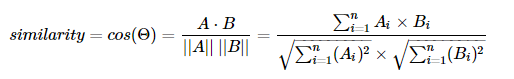

- 문서1 : 저는 사과 좋아요
- 문서2 : 저는 바나나 좋아요
- 문서3 : 저는 바나나 좋아요 저는 바나나 좋아요

위의 세 문서에 대해서 코사인 유사도를 구해보자

In [1]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
# 코사인 유사도를 정의하자.
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))
doc1=np.array([0,1,1,1])
doc2=np.array([1,0,1,1])
doc3=np.array([2,0,2,2])

print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도

0.6666666666666667
0.6666666666666667
1.0000000000000002


코사인 유사도는 벡터의 크기가 아니라 벡터의 방향에 중심을 둔다!

## 유사도를 이용한 추천 시스템 구현하기

캐글에서 사용한 영화 데이터셋을 가지고 영화 추천 시스템을 만들어보자

해당 영화의 줄거리와 줄거리가 유사한 영화를 찾아서 추천하는 시스템을 만들 것입니다.

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(4)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0


In [13]:
data = data.head(10000)

data['overview'].isnull().sum() # null 값이 있는지 확인

0

In [14]:
# pandas의 NULL 값을 처리하는 도구 fillna()를 사용하자

data['overview'] = data['overview'].fillna('')
data['overview'].isnull().sum() # null 값이 있는지 확인

0

In [26]:
tfidf = TfidfVectorizer(stop_words='english')
# overview에 대해서 tf-idf 수행
tfidf_matrix = tfidf.fit_transform(data['overview'])
print(tfidf_matrix.shape)
# 10000개의 영화를 표현하기 위해 32350의 단어가 사용!!

(10000, 32350)


In [28]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.01682915 0.         ... 0.         0.         0.        ]
 [0.01682915 1.         0.04871976 ... 0.         0.01200997 0.        ]
 [0.         0.04871976 1.         ... 0.         0.00735515 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.08838493]
 [0.         0.01200997 0.00735515 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.08838493 0.         1.        ]]


In [18]:
indices = pd.Series(data.index, index=data['title']).drop_duplicates()
print(indices)

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                                ... 
Miracle in Milan                9995
Before the Fall                 9996
The Frisco Kid                  9997
Onmyoji: The Yin Yang Master    9998
State Property 2                9999
Length: 10000, dtype: int64


In [19]:
# 선택한 영화에 대해서 코사인 유사도를 이용해 overview 가 가장 유사한 10개의 영화 찾기

def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당되는 인덱스를 받아옵니다. 이제 선택한 영화를 가지고 연산할 수 있습니다.
    idx = indices[title]

    # 모든 영화에 대해서 해당 영화와의 유사도를 구합니다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬합니다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아옵니다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 받아옵니다.
    movie_indices = [i[0] for i in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴합니다.
    return data['title'].iloc[movie_indices]

In [22]:
get_recommendations('Batman Forever') # 영화 배트맨과 가장 유사한 영화들!

3095          Batman: Mask of the Phantasm
1328                        Batman Returns
9230    Batman Beyond: Return of the Joker
1491                        Batman & Robin
7912                          The Clearing
585                                 Batman
2480                        Open Your Eyes
817                    Eyes Without a Face
9139          Batman & Mr. Freeze: SubZero
8170                      The Trojan Women
Name: title, dtype: object